## Hola! Queres un Casa en California ?
### If you are interested, this document is for you
* If not, just check it out for fun, why not?

> On a more serious note, this is a general analysis of the (quite famous now)  
> California housing dataset
- Ranging from simple analysis to some plotting as well.
- Let's begin with some column analysis

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('California_housing.csv')

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- A load of columns there...

A good start would be to move some unnecessary columns to different dataframes,
Like the median_income and median_house_value. They fit more as separate dataframes in my mind 

In [30]:
age = data['housing_median_age']
income = data['median_income']
value = data["median_house_value"]

median_data = pd.DataFrame()

median_data["median age"] = age
median_data["median income"] = income
median_data["median house value"] = value

median_data.head()

,median age,median income,median house value
0,41.0,8.3252,452600.0
1,21.0,8.3014,358500.0
2,52.0,7.2574,352100.0
3,52.0,5.6431,341300.0
4,52.0,3.8462,342200.0


In [31]:
data.drop(columns=["housing_median_age", "median_income", "median_house_value"], inplace=True)

* Now that's simpler, and if we need the medians they are stored in a different dataframe for clarity

Let's see how the dataframe looks in a little plot, but that matplotlib thing is boooring...
How about seaborn, that very cool graphic library

<Axes: xlabel='median age', ylabel='median house value'>

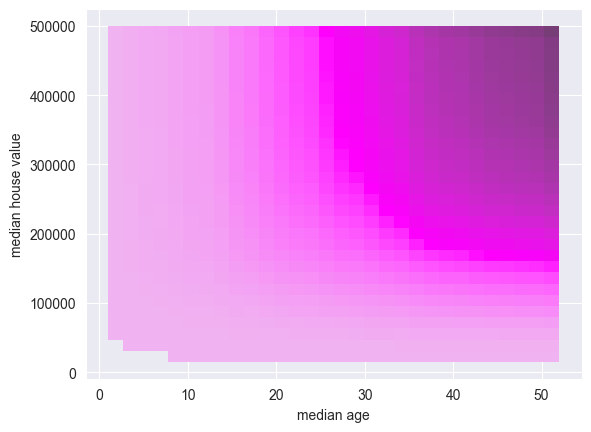

In [32]:
sns.histplot(data=median_data, x="median age", y="median house value", bins=30, color="purple", cumulative=True)

### HUH how insane, the higher the average house age the pricier they are in average..
California seems to love their older houses, which adds up as most of the oceanside houses are also on average on the older side 

In [33]:
col_1 = data["ocean_proximity"]
col_2 = median_data["median age"]

df = pd.concat([col_1, col_2], axis=1)
df.sort_values(by=["ocean_proximity"], ascending=False)

,ocean_proximity,median age
14916,NEAR OCEAN,26.0
15493,NEAR OCEAN,18.0
15442,NEAR OCEAN,4.0
15443,NEAR OCEAN,4.0
15444,NEAR OCEAN,2.0
...,...,...
6967,<1H OCEAN,50.0
6966,<1H OCEAN,45.0
6965,<1H OCEAN,46.0
6964,<1H OCEAN,47.0


Let's take a look back at the og table

In [34]:
data.head()

,longitude,latitude,total_rooms,total_bedrooms,population,households,ocean_proximity
0,-122.23,37.88,880.0,129.0,322.0,126.0,NEAR BAY
1,-122.22,37.86,7099.0,1106.0,2401.0,1138.0,NEAR BAY
2,-122.24,37.85,1467.0,190.0,496.0,177.0,NEAR BAY
3,-122.25,37.85,1274.0,235.0,558.0,219.0,NEAR BAY
4,-122.25,37.85,1627.0,280.0,565.0,259.0,NEAR BAY


We have plenty of interesting info in here. Let's start talking money.
These houses by the beach are nice and all, but how many of them can accompany your needs?
We will be looking at the beachside houses and sorting them by the total bedrooms (The more there are the more chances of bigger houses).

In [35]:
bedroom = data["total_bedrooms"]
room = data["total_rooms"]
oceanside = data["ocean_proximity"].sort_values()
value = value # just to see what we are using

